<a href="https://colab.research.google.com/github/Alvarfer22/Testeo1/blob/main/Ejercicio_deteccion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Detección de características en imágenes

Este cuaderno explora diferentes técnicas para detectar bordes, esquinas, texturas y puntos clave en imágenes. Estas operaciones son fundamentales en visión por computador, ya que permiten identificar estructuras significativas en una imagen.

---

## 🔹 1. Carga de la imagen

Trabajamos en escala de grises para simplificar el procesamiento, ya que muchas técnicas se basan en gradientes de intensidad.

---

## 🔸 2. Detección de bordes

Aplicamos varios detectores clásicos para detectar contornos y cambios bruscos de intensidad:

- **Canny**: detector multietapa muy preciso, sensible a bordes definidos.
- **Sobel**: calcula gradiente de intensidad, útil en X e Y.
- **Scharr**: versión mejorada de Sobel, más precisa.
- **Laplaciano**: detecta áreas de cambio rápido (segunda derivada).

---

## 🟡 3. Detección de esquinas

Las esquinas son regiones con cambios de intensidad en múltiples direcciones:

- **Harris**: detector clásico basado en auto-correlación.
- **Shi-Tomasi**: mejora del método Harris, usado por `goodFeaturesToTrack`.

---

## 🟢 4. Detección de puntos clave

Son características únicas y repetibles, útiles para emparejar imágenes o reconstrucciones:

- **FAST**: muy rápido, ideal para tiempo real.
- **ORB**: combina FAST + BRIEF, muy utilizado en aplicaciones modernas.
- **SIFT**: detecta y describe características invariantes a escala y rotación (muy robusto).

---

## 🟠 5. Detección de texturas

Las texturas permiten identificar patrones repetitivos en la imagen:

- **LBP (Local Binary Patterns)**: método eficiente para analizar patrones locales de textura pixel a pixel.

---

## 📌 6. Comparación y análisis

Cada método tiene ventajas e inconvenientes. Por ejemplo:

- ORB es rápido y robusto.
- Canny da bordes precisos pero requiere ajuste fino.
- Harris puede ser sensible al ruido.
- LBP es ideal para clasificar texturas.

La tabla `comparativa.md` incluida en el repositorio resume estos aspectos.

---
| Detector      | Tipo        | Sensibilidad | Dirección | Escalable | Comentarios |
|---------------|-------------|--------------|-----------|-----------|-------------|
| Canny         | Bordes      | Alta         | Sí        | No        | Detecta contornos nítidos, requiere ajuste |
| Sobel         | Bordes      | Media        | Sí        | Sí        | Buen filtro base para gradientes |
| Scharr        | Bordes      | Alta         | Sí        | Sí        | Mejora de Sobel, más sensible |
| Laplaciano    | Bordes      | Alta         | No        | No        | Detecta cambios bruscos |
| Harris        | Esquinas    | Media        | No        | No        | Buen detector clásico de esquinas |
| Shi-Tomasi    | Esquinas    | Alta         | No        | Sí        | Mejora sobre Harris |
| FAST          | Esquinas    | Alta         | No        | Sí        | Muy rápido, ideal para tiempo real |
| ORB           | Características | Alta     | Sí        | Sí        | Combina FAST + BRIEF, ideal para matching |
| SIFT          | Características | Muy Alta | Sí        | Sí        | Detecta y describe regiones clave |
| LBP           | Texturas    | Media        | N/A       | Sí        | Detecta patrones de textura local |


# Cargar imagen



Saving Callao_+_Capitol_+_Gran_VÃ_a_(Madrid)_(23815769052).webp to Callao_+_Capitol_+_Gran_VÃ_a_(Madrid)_(23815769052) (1).webp


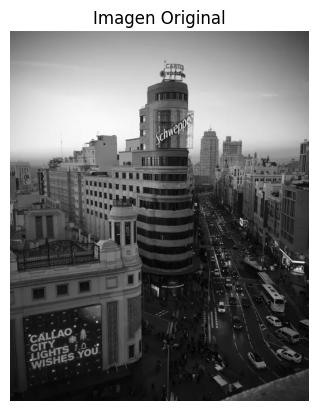

In [18]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Subir imagen manualmente
uploaded = files.upload()

# Obtener nombre del archivo
image_name = list(uploaded.keys())[0]

# Cargar en escala de grises
image = cv2.imread(image_name, cv2.IMREAD_GRAYSCALE)

plt.imshow(image, cmap='gray')
plt.title("Imagen Original")
plt.axis('off')
plt.show()

# Detección de Bordes (Canny, Sobel, Scharr, Laplaciano)


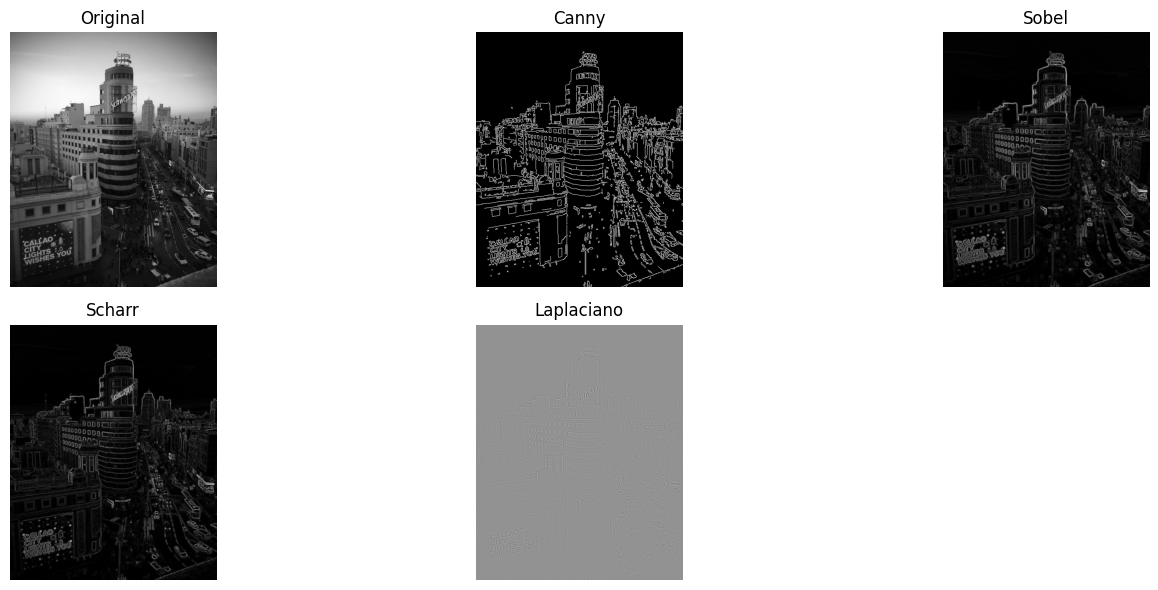

In [19]:
# Canny
canny = cv2.Canny(image, 100, 200)

# Sobel
sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
sobel = np.sqrt(sobelx**2 + sobely**2)

# Scharr
scharrx = cv2.Scharr(image, cv2.CV_64F, 1, 0)
scharry = cv2.Scharr(image, cv2.CV_64F, 0, 1)
scharr = np.sqrt(scharrx**2 + scharry**2)

# Laplaciano
laplacian = cv2.Laplacian(image, cv2.CV_64F)

# Mostrar
titles = ['Original', 'Canny', 'Sobel', 'Scharr', 'Laplaciano']
images = [image, canny, sobel, scharr, laplacian]

plt.figure(figsize=(15, 6))
for i in range(len(images)):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


# Esquinas: Harris y Shi-Tomasi


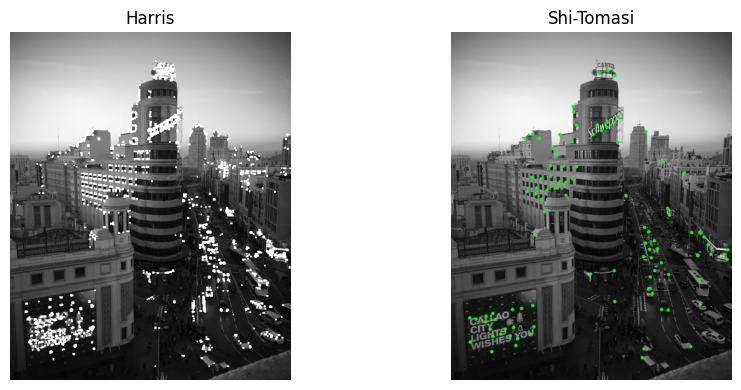

In [20]:
# Harris
harris = cv2.cornerHarris(np.float32(image), 2, 3, 0.04)
harris = cv2.dilate(harris, None)
img_harris = image.copy()
img_harris[harris > 0.01 * harris.max()] = 255

# Shi-Tomasi
corners = cv2.goodFeaturesToTrack(image, 100, 0.01, 10)
corners = np.int32(corners)
img_shi = cv2.cvtColor(image.copy(), cv2.COLOR_GRAY2BGR)
for c in corners:
    x, y = c.ravel()
    cv2.circle(img_shi, (x, y), 3, (0, 255, 0), -1)

# Mostrar
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1), plt.imshow(img_harris, cmap='gray'), plt.title("Harris"), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(img_shi), plt.title("Shi-Tomasi"), plt.axis('off')
plt.tight_layout()
plt.show()


# Detectores ORB, FAST y SIFT

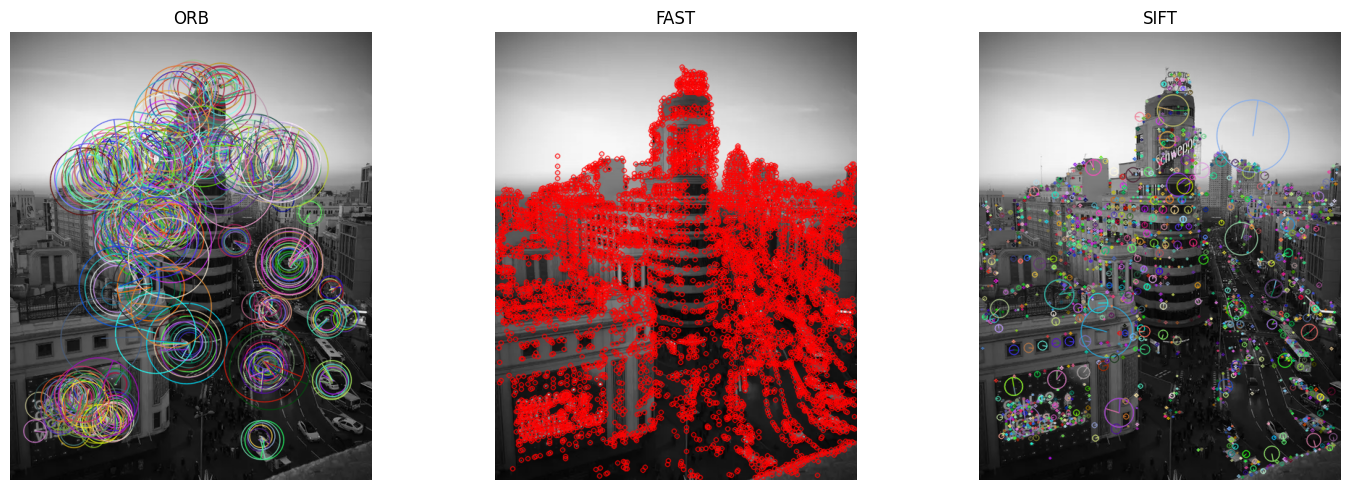

In [21]:
# ORB
orb = cv2.ORB_create()
kp_orb, _ = orb.detectAndCompute(image, None)
img_orb = cv2.drawKeypoints(image, kp_orb, None, flags=4)

# FAST
fast = cv2.FastFeatureDetector_create()
kp_fast = fast.detect(image, None)
img_fast = cv2.drawKeypoints(image, kp_fast, None, color=(255,0,0))

# SIFT
sift = cv2.SIFT_create()
kp_sift, _ = sift.detectAndCompute(image, None)
img_sift = cv2.drawKeypoints(image, kp_sift, None, flags=4)

# Mostrar
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1), plt.imshow(img_orb), plt.title("ORB"), plt.axis('off')
plt.subplot(1, 3, 2), plt.imshow(img_fast), plt.title("FAST"), plt.axis('off')
plt.subplot(1, 3, 3), plt.imshow(img_sift), plt.title("SIFT"), plt.axis('off')
plt.tight_layout()
plt.show()


# Texturas con LBP (Local Binary Patterns)

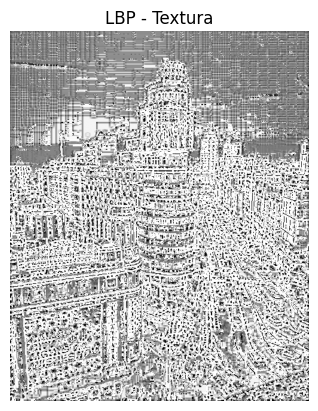

In [22]:
from skimage.feature import local_binary_pattern

radius = 3
n_points = 8 * radius
lbp = local_binary_pattern(image, n_points, radius, method='uniform')

plt.imshow(lbp, cmap='gray')
plt.title("LBP - Textura")
plt.axis('off')
plt.show()
